In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Conneting to SQLite database by using create_engine() function
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

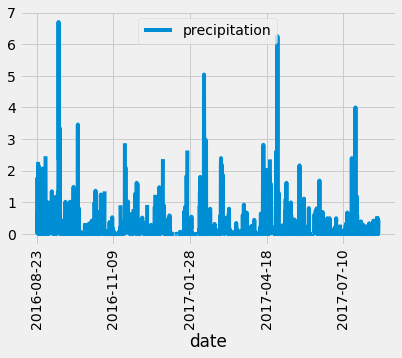

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)

In [11]:
# Summary of the dataframe by using .describe() function
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

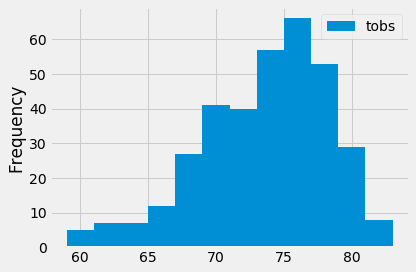

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)
#Convert the Temperature Observation Results to a Dataframe
df = pd.DataFrame(results, columns=['tobs'])
print(df)
df.plot.hist(bins=12)
plt.tight_layout()

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

# June 2015

In [17]:
# Return the minimum, average, and maximum temperatures of the range of dates
def june_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (june_calc_temps('2015-06-01', '2015-06-30'))
print(min_max_avg)

[(66.0, 81.0, 74.99014778325123)]


In [18]:
# Design a query to retrieve the month of precipitation data and plot the results. 
#Starting from the first data point in the dataset. 
june_1st = dt.date(2015, 6, 1)
# Calculate the date one month from the first date in data set.
june_31st = dt.date(2015, 6, 1) + dt.timedelta(days=30)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_31st).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation
0,2015-06-01,0.00
1,2015-06-02,0.00
2,2015-06-03,0.00
3,2015-06-04,0.00
4,2015-06-05,0.00
...,...,...
205,2015-06-27,0.17
206,2015-06-28,0.16
207,2015-06-29,1.62
208,2015-06-30,0.00


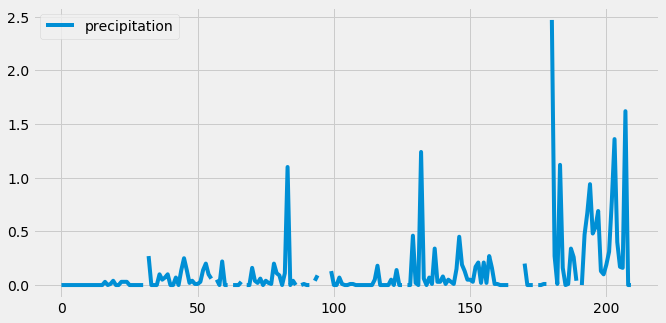

In [24]:
df.plot(figsize=(10,5))

In [25]:
df.describe()

,precipitation
count,193.000000
mean,0.121969
std,0.297103
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,2.470000


# June 2016

In [27]:
# Return the minimum, average, and maximum temperatures of the range of dates
def june_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (june_calc_temps('2016-06-01', '2016-06-30'))
print(min_max_avg)

[(64.0, 81.0, 75.17525773195877)]


In [28]:
# Design a query to retrieve the month of precipitation data and plot the results. 
#Starting from the first data point in the dataset. 
june_1st = dt.date(2016, 6, 1)
# Calculate the date one month from the first date in data set.
june_31st = dt.date(2016, 6, 1) + dt.timedelta(days=30)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_31st).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation
0,2016-06-01,0.06
1,2016-06-02,0.00
2,2016-06-03,0.00
3,2016-06-04,0.00
4,2016-06-05,0.00
...,...,...
195,2016-06-26,0.70
196,2016-06-27,0.30
197,2016-06-28,0.25
198,2016-06-29,0.35


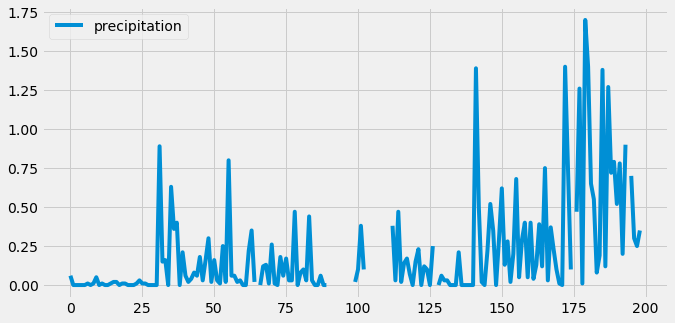

In [29]:
df.plot(figsize=(10,5))

In [30]:
df.describe()

,precipitation
count,177.000000
mean,0.207514
std,0.324999
min,0.000000
25%,0.010000
50%,0.060000
75%,0.260000
max,1.700000


# June 2017

In [31]:
# Return the minimum, average, and maximum temperatures of the range of dates
def june_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (june_calc_temps('2017-06-01', '2017-06-30'))
print(min_max_avg)

[(71.0, 83.0, 77.21989528795811)]


In [32]:
# Design a query to retrieve the month of precipitation data and plot the results. 
#Starting from the first data point in the dataset. 
june_1st = dt.date(2017, 6, 1)
# Calculate the date one month from the first date in data set.
june_31st = dt.date(2017, 6, 1) + dt.timedelta(days=30)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_31st).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation
0,2017-06-01,0.00
1,2017-06-02,0.00
2,2017-06-03,0.02
3,2017-06-04,0.00
4,2017-06-05,0.00
...,...,...
190,2017-06-27,0.10
191,2017-06-28,0.02
192,2017-06-29,0.04
193,2017-06-30,0.20


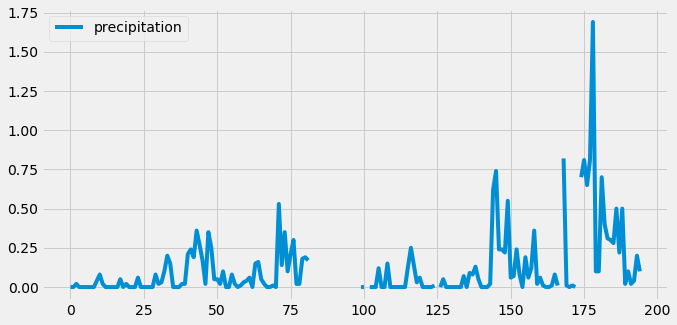

In [33]:
df.plot(figsize=(10,5))

In [34]:
df.describe()

,precipitation
count,175.000000
mean,0.118743
std,0.215414
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


# December 2015

In [35]:
# Return the minimum, average, and maximum temperatures of the range of dates
def june_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (june_calc_temps('2015-12-01', '2015-12-31'))
print(min_max_avg)

[(65.0, 82.0, 73.42391304347827)]


In [36]:

# Design a query to retrieve the month of precipitation data and plot the results. 
#Starting from the first data point in the dataset. 
june_1st = dt.date(2015, 12, 1)
# Calculate the date one month from the first date in data set.
june_31st = dt.date(2015, 12, 1) + dt.timedelta(days=30)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_31st).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation
0,2015-12-01,0.00
1,2015-12-02,0.00
2,2015-12-03,0.06
3,2015-12-04,0.02
4,2015-12-05,0.00
...,...,...
179,2015-12-26,0.81
180,2015-12-27,2.21
181,2015-12-29,NaN
182,2015-12-30,0.03


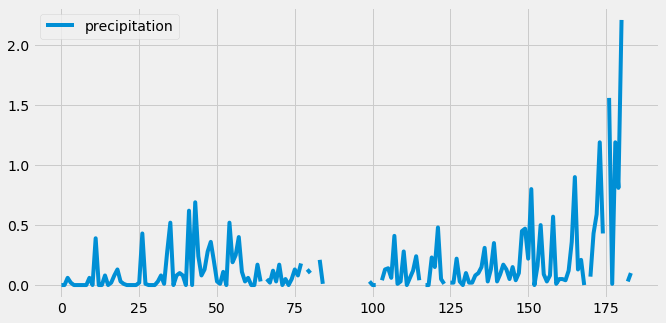

In [37]:
df.plot(figsize=(10,5))

In [38]:
df.describe()

,precipitation
count,162.000000
mean,0.169506
std,0.290003
min,0.000000
25%,0.010000
50%,0.075000
75%,0.187500
max,2.210000


# December 2016

In [39]:
# Return the minimum, average, and maximum temperatures of the range of dates
def june_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (june_calc_temps('2016-12-01', '2016-12-31'))
print(min_max_avg)

[(60.0, 78.0, 71.13)]


In [40]:
# Design a query to retrieve the month of precipitation data and plot the results. 
#Starting from the first data point in the dataset. 
june_1st = dt.date(2016, 12, 1)
# Calculate the date one month from the first date in data set.
june_31st = dt.date(2016, 12, 1) + dt.timedelta(days=30)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_31st).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation
0,2016-12-01,0.12
1,2016-12-02,0.03
2,2016-12-03,0.00
3,2016-12-04,0.03
4,2016-12-05,0.43
...,...,...
195,2016-12-27,0.14
196,2016-12-28,0.14
197,2016-12-29,1.03
198,2016-12-30,2.37


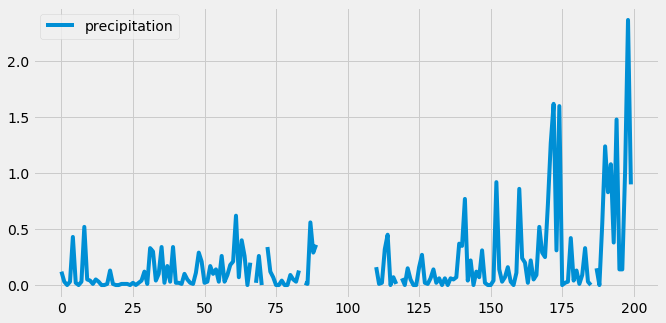

In [41]:
df.plot(figsize=(10,5))

In [42]:
df.describe()

,precipitation
count,178.000000
mean,0.199494
std,0.342967
min,0.000000
25%,0.020000
50%,0.060000
75%,0.247500
max,2.370000


# December 2017

In [44]:
# Return the minimum, average, and maximum temperatures of the range of dates
def june_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (june_calc_temps('2017-12-01', '2017-12-31'))
print(min_max_avg)

[(None, None, None)]


In [45]:
# Design a query to retrieve the month of precipitation data and plot the results. 
#Starting from the first data point in the dataset. 
june_1st = dt.date(2017, 12, 1)
# Calculate the date one month from the first date in data set.
june_31st = dt.date(2017, 12, 1) + dt.timedelta(days=30)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_31st).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation


In [47]:
df.plot(figsize=(10,5))

TypeError: no numeric data to plot

In [48]:
df.describe()

,date,precipitation
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


# Findings

Our analysis was well formatted and precise. W.Avy liked out data. However, he wanted the seasonal data of Oahu in order to find out how the weather in the future can affect the new business. W.Avy wanted to find out whether there are specific seasons that would come regulary which can affect the new business.

By completing the challenge, I was able to find out the key aspects of Oahu's wether data and its season. Found data by determining statistical data of July to December. We successfully manged to have min & max temperature and their average of June 2015-2017, December 2015-2017. In addition, set up a query to return the precipitation data and visualized them by each time frame.

By using the describe function, the data is visual and the max precipation of June decreases as the year goes which is opposite to the fact that it increased in Decembers until 2017 with no data available.

# Analytical recommendations on future steps

It seems like June and December are good season to have the business running but when Hawaii is well known with great weather all year long but with sudden weather changes and rain falls, further anaylsis for each month would be necessary to be more precise.

By forming plot charts and visualizing each data will make W.Avy to understand the seasonal weather information better when we start analysing for each month and each season.

Precipitation is important but also, for a surf shop business, different surfing spots + wave forecast analysis might be necessary to assure future customers. Because it is not always hard rain = tough and dangerous waves. And you can always enjoy your icecream under a roof.